In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import scipy.optimize as optimize
from scipy.optimize import brenth

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

pi=4*np.arctan(1.)

In [2]:
def U(x): return 0.25*x**4-2*alpha*x**3/3.-0.5*x**2
def dU(x): return x**3-2*alpha*x**2-x
def ddU(x): return 3*x**2-4*alpha*x-1.

def T(x): return 1-(dU(x)/g1)**2
def dT(x): return -2*dU(x)*ddU(x)/g1**2

def Ueff(x): return U(x)+T(x)/g2
def dUeff(x): return dU(x)+dT(x)/g2
def ddUeff(x):
    return ddU(x)*(1.-2*ddU(x)/(g2*g1**2))

def integrand(x):
    return dUeff(x)/T(x)

In [3]:
def root(F, x1, x2, div, it):
    X=np.linspace(x1,x2, div)
    roots=np.array([])
    for i in range(div-1):
        if F(X[i])*F(X[i+1])<=0:
            p1=X[i]
            p2=X[i+1]
            r=brenth(F, p1, p2, maxiter=it)
            roots=np.append(roots, r)
    return roots

In [4]:
def integral2(F, X):
    l=len(X)
    Func=np.zeros(l)
    id0=int(0.5*l)
    xmin=X[id0]
    Func[id0]=0
    for i in range(1,l):
        if i<=id0:
            x0 = X[id0-i+1]
            x1 = X[id0-i]
            Func[id0-i]=integrate.quad(F, x0, x1)[0]
            Func[id0-i]=Func[id0-i]+Func[id0-i+1]
        else:
            x0 = X[i-1]
            x1 = X[i]
            Func[i]=integrate.quad(F, x0, x1)[0]
            Func[i]=Func[i]+Func[i-1]
    return Func

In [5]:
def evol(x, h):
    e=np.random.normal(0, 1)
    y=x-h*dU(x)/g1+np.sqrt(2*T(x)*h/(g1*g2))*e
    return y

In [6]:
alpha=0.05
g1=1
g2=0.1

In [7]:
cpU=np.array([alpha-np.sqrt(alpha**2+1),0 ,alpha+np.sqrt(alpha**2+1)]) #this stores all the critical points for functions
cpdU=np.array([2*alpha/3.-np.sqrt(4*alpha**2+3)/3, 2*alpha/3.+np.sqrt(4*alpha**2+3)/3])
cpT=np.sort( np.concatenate([cpU, cpdU] ) )
cpUeff=root(dUeff, -10, 10, 10000, 100)

## $g_1$ mínimo

In [8]:
g1=1.1; step=1.0; error=1e3; T0=min(T(cpT)); it=1; vec=np.array([T0]) #esto debería ser función pero so far no funciona
while error > 1e-4:
    g1=g1-np.sign(T0)*step
    T1=min(T(cpT))
    error=np.absolute(T1)
    vec=np.append(vec, T1)
    dvec=np.gradient(vec)
    if dvec[-1]<1e-2: step=step/2.
    T0=T1
    it+=1
    if it==100: break
g1min=g1

In [9]:
alphas=np.array([0.01, 0.5])

## Plot several $Ueff$

In [10]:
alpha=alphas[1]
cpU=np.array([alpha-np.sqrt(alpha**2+1),0 ,alpha+np.sqrt(alpha**2+1)]) #this stores all the critical points for functions
cpdU=np.array([2*alpha/3.-np.sqrt(4*alpha**2+3)/3, 2*alpha/3.+np.sqrt(4*alpha**2+3)/3])
cpT=np.sort( np.concatenate([cpU, cpdU] ) )
    
g1=1.1; step=1.0; error=1e3; T0=min(T(cpT)); it=1; vec=np.array([T0]) #esto debería ser función pero so far no funciona
while error > 1e-4:
    g1=g1-np.sign(T0)*step
    T1=min(T(cpT))
    error=np.absolute(T1)
    vec=np.append(vec, T1)
    dvec=np.gradient(vec)
    if dvec[-1]<1e-2: step=step/2.
    T0=T1
    it+=1
    if it==100: break
g1min=g1

In [11]:
G1=np.array([1.01*g1min, 2*g1min, 10*g1min])
value=G1/g1min

### Aquí inicia el Loop

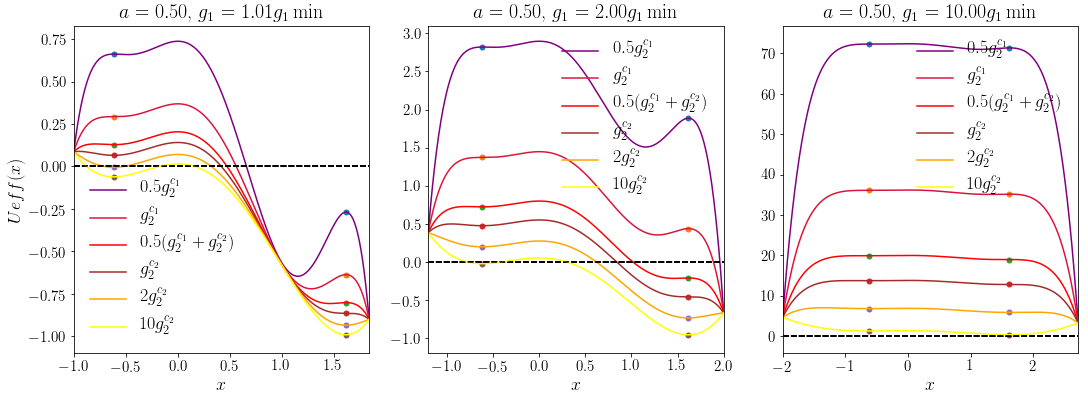

In [12]:
plt.figure(figsize=(18,6))
for j in range(len(G1)):
    g1=G1[j]
    #..............................................................................................................
    g2=1e-5
    step=5
    it=1
    for i in range(10000):
        aux=ddUeff(cpU[0])
        if aux>0:
            g2=g2-step
        else:
            g2=g2+step
        if np.mod(it,100)==0:
            step=step/20.
        it=it+1
    g2c1=g2

    g2=1e-5
    step=5
    it=1
    for i in range(10000):
        aux=ddUeff(cpU[2])
        if aux>0:
            g2=g2-step
        else:
            g2=g2+step
        if np.mod(it,100)==0:
            step=step/20.
        it=it+1
    g2c2=g2
    #.............................................................................................................
    
    plt.subplot(1,3,j+1) 
    G2=np.array([0.5*g2c1, g2c1, 0.5*(g2c1+g2c2), g2c2, 2*g2c2, 10*g2c2])
    labels=[r'$0.5g_2^{c_1}$', r'$g_2^{c_1}$ ', r' $0.5(g_2^{c_1}+g_2^{c_2})$ ', 
            r' $g_2^{c_2}$' , r' $2g_2^{c_2}$ ', '$10g_2^{c_2}$']
    nplots=len(G2)
    colors=['purple','crimson' ,'red','brown' ,'orange', 'yellow', ]
    xmin, xmax=root(T, 15*min(cpT), 15*max(cpT), 700, 100)
    x=np.linspace(xmin, xmax, 1000)
    for i in range(nplots):
        g2=G2[i]
        plt.plot(x,Ueff(x), color=colors[i], label=labels[i])
        plt.scatter(cpU[cpU!=0], Ueff(cpU[cpU!=0]), lw=0)
        plt.plot([min(x),max(x)], [0,0], 'k--')
        plt.xlim([min(x), max(x)])
    plt.legend(loc='best', frameon=0, fontsize=18)    
    plt.xlabel('$x$', fontsize=18)
    if j==0: plt.ylabel('$Ueff(x)$', fontsize=18)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title('$a=%.2f$, $g_1=%.2f g_1\min $'%(alpha, value[j]), fontsize=20)
    
plt.savefig('severaleffpot.png', bbox_inches='tight')
plt.show()
plt.close()

## Probabilities

/home/brawantonio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: overflow encountered in exp
/home/brawantonio/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4523: RuntimeWarning: overflow encountered in add
  ret = (d * (y[slice1] + y[slice2]) / 2.0).sum(axis)
/home/brawantonio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in true_divide


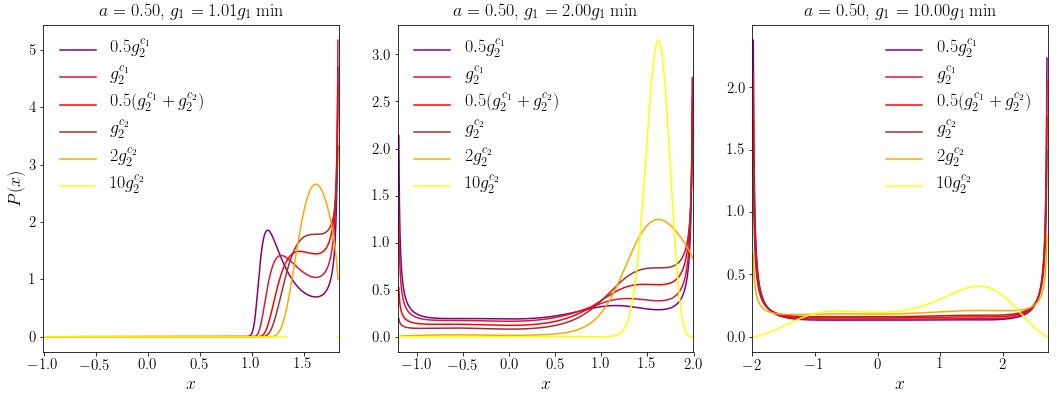

In [13]:
plt.figure(figsize=(18,6))
for j in range(len(G1)):
    g1=G1[j]
    
    g2=1e-5
    step=5
    it=1
    for i in range(10000):
        aux=ddUeff(cpU[0])
        if aux>0:
            g2=g2-step
        else:
            g2=g2+step
        if np.mod(it,100)==0:
            step=step/20.
        it=it+1
    g2c1=g2

    g2=1e-5
    step=5
    it=1
    for i in range(10000):
        aux=ddUeff(cpU[2])
        if aux>0:
            g2=g2-step
        else:
            g2=g2+step
        if np.mod(it,100)==0:
            step=step/20.
        it=it+1
    g2c2=g2
    #......................................................................................
    G2=np.array([0.5*g2c1, g2c1, 0.5*(g2c1+g2c2), g2c2, 2*g2c2, 10*g2c2])
    labels=[r' $0.5g_2^{c_1}$', r'$g_2^{c_1}$', r' $0.5(g_2^{c_1}+g_2^{c_2})$ ', 
            r' $g_2^{c_2}$ ', r' $2g_2^{c_2}$', '$10g_2^{c_2}$']
    nplots=len(G2)
    colors=['purple','crimson' ,'red','brown' ,'orange', 'yellow', ]
    xmin, xmax=root(T, 9*min(cpT), 9*max(cpT), 100, 100)
    x=np.linspace(0.999*xmin, 0.999*xmax, 1000)

    idx=3
    plt.subplot(1, 3, j+1)
    for i in range(len(G2)):
        g2=G2[i]

        inte=integral2(integrand, x)
        inte=-g2*inte
        prob=np.exp(inte)
        prob[prob==np.nan]=0
        Z=np.trapz(prob, x)

        plt.plot(x[idx:-idx], prob[idx:-idx]/Z, color=colors[i], label=labels[i], alpha = 1)

    plt.xlim([min(x), max(x)])
    plt.xlabel(r'$x$', fontsize=18)
    if j ==0: plt.ylabel('$P(x)$', fontsize=18)
    plt.title('$a=%.2f$, $g_1=%.2f g_1\min $'%(alpha, value[j]), fontsize=18)
    plt.legend(loc='best', frameon=0, fontsize=18)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

plt.savefig('severalprobabilities.png', bbox_inches='tight')
plt.show()
plt.close()

## Difussion

In [ ]:
plt.figure(figsize=(18,6))
for j in range(len(G1)):
    g1=G1[j]
    
    g2=1e-5
    step=5
    it=1
    for i in range(10000):
        aux=ddUeff(cpU[0])
        if aux>0:
            g2=g2-step
        else:
            g2=g2+step
        if np.mod(it,100)==0:
            step=step/20.
        it=it+1
    g2c1=g2

    g2=1e-5
    step=5
    it=1
    for i in range(10000):
        aux=ddUeff(cpU[2])
        if aux>0:
            g2=g2-step
        else:
            g2=g2+step
        if np.mod(it,100)==0:
            step=step/20.
        it=it+1
    g2c2=g2
    #......................................................................................
    G2=np.array([0.5*g2c1, g2c1, 0.5*(g2c1+g2c2), g2c2, 2*g2c2, 10*g2c2])
    xmin, xmax=root(T, 9*min(cpT), 9*max(cpT), 100, 100)
    x=np.linspace(0.999*xmin, 0.999*xmax, 1000)

    idx=3
    plt.subplot(1, 3, j+1)
    for i in range(len(G2)):
        g2=G2[i]

        inte=integral2(integrand, x)
        inte=-g2*inte
        prob=np.exp(inte)
        prob[prob==np.nan]=0
        Z=np.trapz(prob, x)


## Langevin 

In [14]:
alpha=alphas[0]
cpU=np.array([alpha-np.sqrt(alpha**2+1),0 ,alpha+np.sqrt(alpha**2+1)]) #this stores all the critical points for functions
cpdU=np.array([2*alpha/3.-np.sqrt(4*alpha**2+3)/3, 2*alpha/3.+np.sqrt(4*alpha**2+3)/3])
cpT=np.sort( np.concatenate([cpU, cpdU] ) )
    
g1=1.1; step=1.0; error=1e3; T0=min(T(cpT)); it=1; vec=np.array([T0]) #esto debería ser función pero so far no funciona
while error > 1e-4:
    g1=g1-np.sign(T0)*step
    T1=min(T(cpT))
    error=np.absolute(T1)
    vec=np.append(vec, T1)
    dvec=np.gradient(vec)
    if dvec[-1]<1e-2: step=step/2.
    T0=T1
    it+=1
    if it==100: break
g1min=g1

G1=np.array([1.01*g1min, 2*g1min, 10*g1min])
value=G1/g1min

In [15]:
g1=G1[1]
  
g2=1e-5
step=5
it=1
for i in range(10000):
    aux=ddUeff(cpU[0])
    if aux>0: g2=g2-step
    else: g2=g2+step
    if np.mod(it,100)==0: step=step/20.
    it=it+1
g2c1=g2

g2=1e-5
step=5
it=1
for i in range(10000):
    aux=ddUeff(cpU[2])
    if aux>0: g2=g2-step
    else: g2=g2+step
    if np.mod(it,100)==0: step=step/20.
    it=it+1
g2c2=g2

G2=np.array([0.5*g2c1, g2c1, 0.5*(g2c1+g2c2), g2c2, 2*g2c2, 10*g2c2])

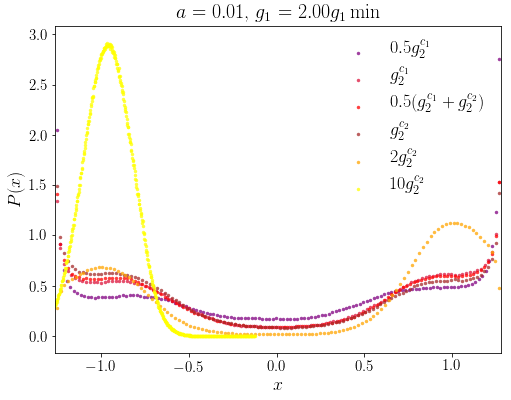

In [16]:
plt.figure(figsize=(8,6))
H = np.array([5e-4, 1e-3, 1e-3, 1e-3, 1e-2, 5e-1])
for j in range(len(G2)):
    g2=G2[j]
    it=100000
    h=H[j]
    x=np.zeros(it)
    X=np.array([])
    xmin, xmax=root(T, 99*min(cpT), 99*max(cpT), 500, 100)
    for k in range(500):
        x[0]=np.random.uniform(0.6*xmin,0.6*xmax) #not so legal dude
        for i in range(1,it):
            x[i]=evol(x[i-1],h)
            if x[i]>xmax or x[i]<xmin: x[i]=x[i-1]
    X = np.append(X,x)
    counts,bin_edges = np.histogram(X, 'fd', density=1)
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
    plt.scatter(bin_centres, counts,c=colors[j], lw=0, s=12, alpha=0.75, label=labels[j])
    plt.xlim([xmin,xmax])
    

plt.legend(loc='best', frameon=0, fontsize=18)
plt.ylabel(r'$P(x)$', fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.title(r'$a=%.2f$, $g_1=%.2f g_1\min $'%(alpha, value[1]), fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
plt.savefig('LDW.png')
plt.close()